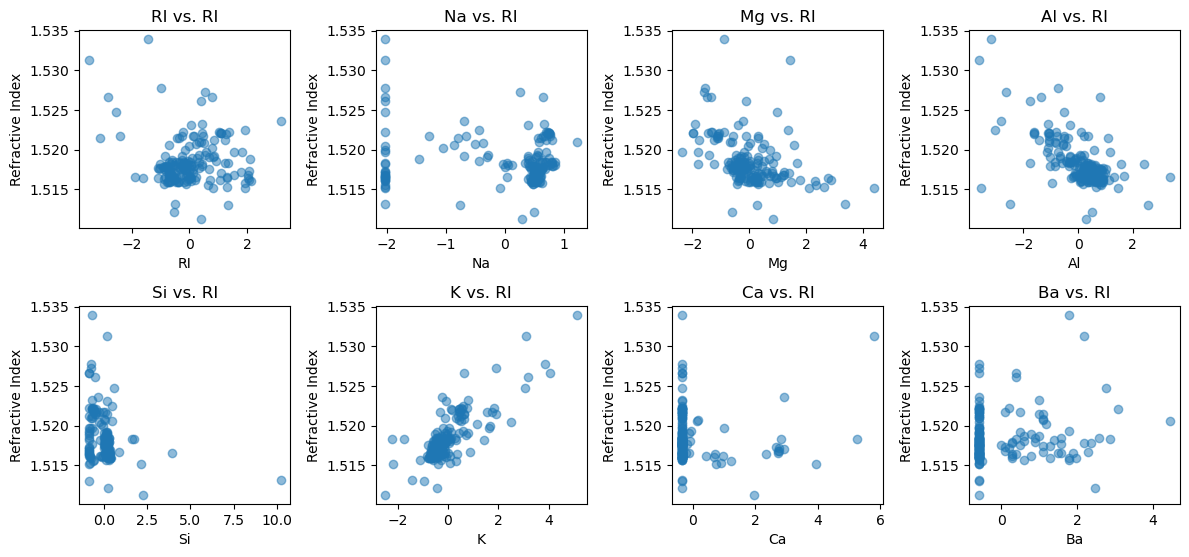



Epoch [100/1000], Loss: 0.0548
Epoch [200/1000], Loss: 0.0027
Epoch [300/1000], Loss: 0.0004
Epoch [400/1000], Loss: 0.0001
Epoch [500/1000], Loss: 0.0000
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000
Test MSE: 0.0000


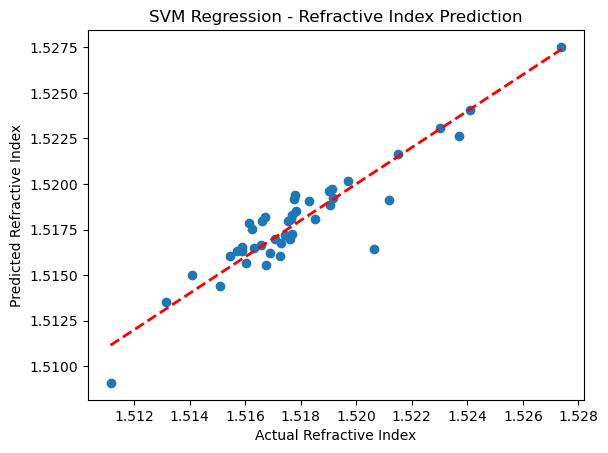

In [1]:
# Import necessary libraries
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the Glass Identification dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType']
glass_data = pd.read_csv(url, names=column_names, index_col='Id')

# Use refractive index (RI) as the target variable (output)
X = glass_data.drop(['RI', 'GlassType'], axis=1).values
y = glass_data['RI'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualize the features
feature_names = glass_data.columns[:-2]
plt.figure(figsize=(12, 8))
for i in range(len(feature_names)):
    plt.subplot(3, 4, i + 1)
    plt.scatter(X_train[:, i], y_train, alpha=0.5)
    plt.title(f'{feature_names[i]} vs. RI')
    plt.xlabel(feature_names[i])
    plt.ylabel('Refractive Index')
plt.tight_layout()
plt.show()

# Define the SVM regression model using PyTorch
class SVMRegression(nn.Module):
    def __init__(self):
        super(SVMRegression, self).__init__()
        self.fc = nn.Linear(X_train.shape[1], 1)

    def forward(self, x):
        return self.fc(x)

# Initialize the model, loss function, and optimizer
model = SVMRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the SVM regression model
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = torch.FloatTensor(X_train)
    labels = torch.FloatTensor(y_train).view(-1, 1)

    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)

    # Calculate the loss
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the model on the test set
with torch.no_grad():
    test_inputs = torch.FloatTensor(X_test)
    predicted_ri = model(test_inputs).numpy().reshape(-1)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predicted_ri)
print(f'Test MSE: {mse:.4f}')

# Visualize the predicted refractive index vs. actual refractive index
plt.scatter(y_test, predicted_ri)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Refractive Index')
plt.ylabel('Predicted Refractive Index')
plt.title('SVM Regression - Refractive Index Prediction')
plt.show()


In [2]:
 # Import necessary libraries
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the Superconductors dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip"
superconductors_data = pd.read_csv(url, compression='zip', encoding='latin1')

# Drop unnecessary columns and separate features and target variables
X = superconductors_data.drop(["critical_temp", "material", "number_of_elements"], axis=1)
y = superconductors_data["critical_temp"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a multi-output SVM regressor
svm_regressor = MultiOutputRegressor(SVR(kernel='rbf', C=1.0))
svm_regressor.fit(X_train, y_train)

# Test the model on the test set
y_pred = svm_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Test Mean Squared Error: {mse:.4f}')

# Display some examples of predictions
print("\nExamples of Predictions vs. Actual:")
print(pd.DataFrame({"Actual": y_test.iloc[0:5].values, "Predicted": y_pred[0:5]}))


ValueError: Multiple files found in ZIP file. Only one file per ZIP: ['unique_m.csv', 'train.csv']

In [3]:
# Import necessary libraries
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the Superconductors dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00464/superconduct.zip"
superconductors_data = pd.read_csv(url, compression='zip', encoding='latin1')

# Drop unnecessary columns and separate features and target variables
X = superconductors_data.drop(["critical_temp", "material", "number_of_elements"], axis=1)
y = superconductors_data["critical_temp"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a SVM regressor
svm_regressor = SVR(kernel='rbf', C=1.0)
svm_regressor.fit(X_train, y_train)

# Test the model on the test set
y_pred = svm_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Test Mean Squared Error: {mse:.4f}')

# Display some examples of predictions
print("\nExamples of Predictions vs. Actual:")
print(pd.DataFrame({"Actual": y_test.iloc[0:5].values, "Predicted": y_pred[0:5]}))


ValueError: Multiple files found in ZIP file. Only one file per ZIP: ['unique_m.csv', 'train.csv']